In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()

Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\adhee\AppData\Local\Temp\ipykernel_20592\3277406188.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,0,0,0,0,0.0\r\n1,2023-01-01 01:00:00,102,0,61,1085,1248.0\r\n2,2023-01-01 02:00:00,88,0,58,0,146.0\r\n3,2023-01-01 03:00:00,0,0,51,0,51.0\r\n4,2023-01-01 04:00:00,0,0,63,0,63.0\r\n5,2023-01-01 05:00:00,182,0,43,0,225.0\r\n6,2023-01-01 06:00:00,100,0,49,0,149.0\r\n7,2023-01-01 07:00:00,111,0,0,0,111.0\r\n8,2023-01-01 08:00:00,0,0,0,0,0.0\r\n9,2023-01-01 09:00:00,0,0,0,0,0.0\r\n10,2023-01-01 10:00:00,0,0,0,0,0.0\r\n11,2023-01-01 11:00:00,114,0,0,0,114.0\r\n12,2023-01-01 12:00:00,64,0,48,0,112.0\r\n13,2023-01-01 13:00:00,68,2204,0,0,2272.0\r\n14,2023-01-01 14:00:00,78,0,0,0,78.0\r\n15,2023-01-01 15:00:00,152,0,0,0,152.0\r\n16,2023-01-01 16:00:00,128,0,0,0,128.0\r\n17,2023-01-01 17:00:00,86,0,0,0,86.0\r\n18,2023-01-01 18:00:00,85,0,70,0,155.0\r\n19,2023-01-01 19:00:00,0,0,0,0,0.0\r\n20,2023-01-01 20:00:00,181,0,25,0,206.0\r\n21,2023-01-01 21:00:00,52,0,54,0,106.0\r\n22,2023-01-01 22:00:00,0,0,25,0,25.0\r\n23,2023-0

In [27]:
df_raw.columns

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [28]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,0,0,0,0,0.0
1,2023-01-01 01:00:00,102,0,61,1085,1248.0
2,2023-01-01 02:00:00,88,0,58,0,146.0
3,2023-01-01 03:00:00,0,0,51,0,51.0
4,2023-01-01 04:00:00,0,0,63,0,63.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,107,0,92,0,199.0
4317,2023-06-29 21:00:00,0,1311,93,0,1404.0
4318,2023-06-29 22:00:00,64,1065,45,0,1174.0
4319,2023-06-29 23:00:00,192,2170,44,0,2406.0


In [29]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    28
dtype: int64


In [30]:
df_raw[df_raw['total_power'].isna()].index

Index([  45,   48,   53,  175,  320,  338,  483,  520,  543,  883,  966, 1023,
       1045, 1230, 1424, 1465, 1475, 1584, 1877, 1998, 2045, 2228, 2422, 2663,
       3042, 3694, 4089, 4090],
      dtype='int64')

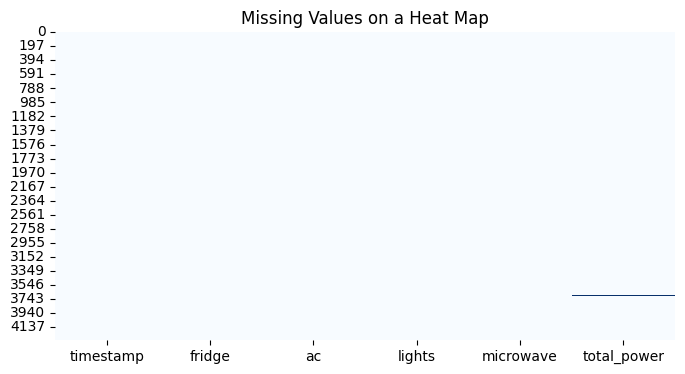

In [31]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [32]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\adhee\AppData\Local\Temp\ipykernel_20592\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [33]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [34]:
print(df_clean.head())
print(df_clean.index)

            timestamp  fridge  ac  lights  microwave  total_power
0 2023-01-01 00:00:00       0   0       0          0          0.0
1 2023-01-01 01:00:00     102   0      61       1085       1248.0
2 2023-01-01 02:00:00      88   0      58          0        146.0
3 2023-01-01 03:00:00       0   0      51          0         51.0
4 2023-01-01 04:00:00       0   0      63          0         63.0
RangeIndex(start=0, stop=4321, step=1)


In [35]:
print(df_clean.columns)

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')


In [36]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [38]:
print(df_clean.index)
print(df_clean.dtypes)

RangeIndex(start=0, stop=4321, step=1)
timestamp      datetime64[ns]
fridge                  int64
ac                      int32
lights                  int32
microwave               int64
total_power           float64
dtype: object


In [39]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')
df_clean = df_clean.dropna(subset=['timestamp'])
df_clean = df_clean.set_index('timestamp')
df_clean = df_clean.sort_index()

In [40]:
df_daily = df_clean.resample('D').mean()
df_weekly_sum = df_clean.resample('W').sum()
print("Daily resampled Shape:", df_daily.shape)
print("Weekly resampled Shape:", df_weekly_sum.shape)

Daily resampled Shape: (181, 5)
Weekly resampled Shape: (27, 5)


In [41]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,0,0,0,0,0.0
1,2023-01-01 01:00:00,102,0,61,1085,1248.0
2,2023-01-01 02:00:00,88,0,58,0,146.0
3,2023-01-01 03:00:00,0,0,51,0,51.0
4,2023-01-01 04:00:00,0,0,63,0,63.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,107,0,92,0,199.0
4317,2023-06-29 21:00:00,0,1311,93,0,1404.0
4318,2023-06-29 22:00:00,64,1065,45,0,1174.0
4319,2023-06-29 23:00:00,192,2170,44,0,2406.0


In [42]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [43]:
df_daily.to_csv('timed-data',index=True)
df_daily.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,69.916667,168.666667,22.791667,45.208333,306.583333
2023-01-02,72.625000,331.291667,29.708333,0.000000,540.500000
2023-01-03,70.750000,173.208333,37.958333,0.000000,291.541667
2023-01-04,70.750000,237.166667,23.250000,46.375000,377.541667
2023-01-05,84.791667,261.625000,29.708333,0.000000,376.125000


In [44]:
df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,1678,4048,547,1085,7358.0
2023-01-08,12944,30057,5220,5269,56336.0
2023-01-15,14576,32528,5488,9680,62291.0
2023-01-22,13981,35349,5529,8343,63369.0
2023-01-29,13853,15909,5385,3146,38426.0
2023-02-05,13505,29258,5025,6131,53919.0
2023-02-12,14632,29896,5643,7193,57425.0
2023-02-19,13611,27626,5551,5110,53877.0
2023-02-26,13929,44645,5050,5835,69651.0


In [49]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

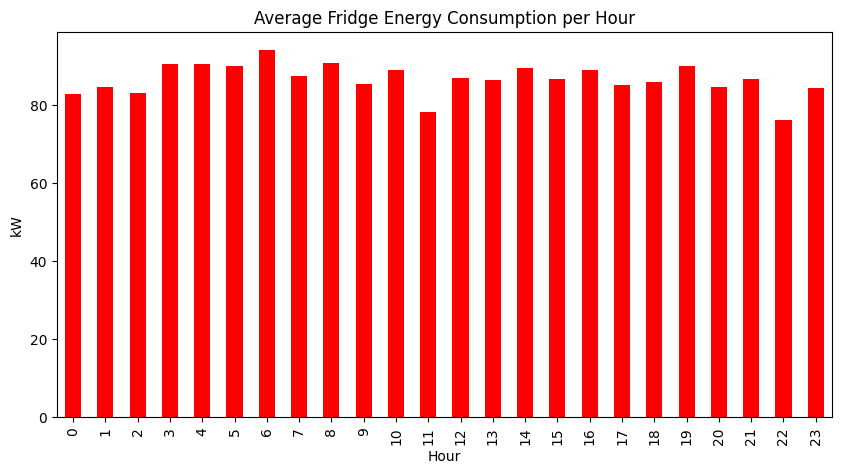

In [50]:
hourly_stats = df.groupby('hour')['fridge'].mean()
plt.figure(figsize=(10,5))
hourly_stats.plot(kind='bar', color='red')
plt.title("Average Fridge Energy Consumption per Hour")
plt.xlabel("Hour")
plt.ylabel("kW")
plt.show()

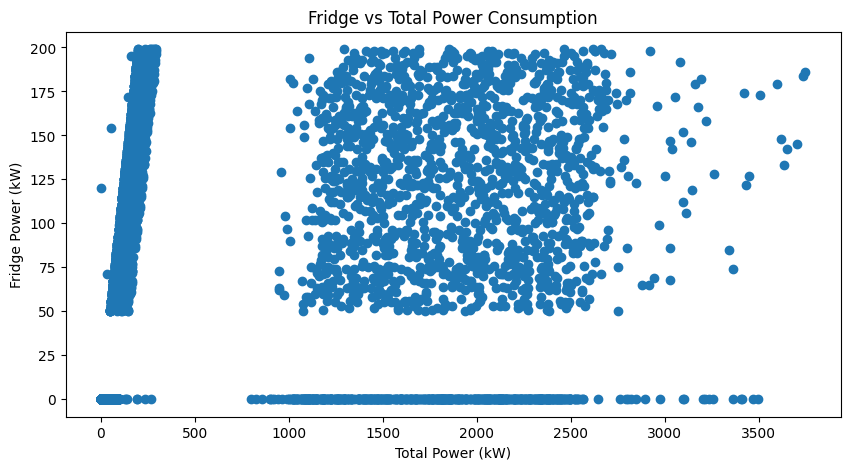

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(df['total_power'], df['fridge'])
plt.title("Fridge vs Total Power Consumption")
plt.xlabel("Total Power (kW)")
plt.ylabel("Fridge Power (kW)")
plt.show()